In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
a_Sharpen = np.array([
                [0,-1,0],
                [-1,5,-1],
                [0,-1,0],
])
a_GaussianBlur = np.array([
                [-1/256.0,-4/256.0,-6/256.0,-4/256.0,-1/256.0],
                [-4/256.0, -16/256.0, -24/256.0, -16/256.0, -4/256.0],
                [-6/256.0, -24/256.0, -36/256.0, -24/256.0, -6/256.0],
                [-4/256.0, -16/256.0, -24/256.0, -16/256.0, -4/256.0],
                [-1/256.0,-4/256.0,-6/256.0,-4/256.0,-1/256.0],
                
])
a_UnsharpMasking = np.array([
                [-1/256.0,-4/256.0,-6/256.0,-4/256.0,-1/256.0],
                [-4/256.0, -16/256.0, -24/256.0, -16/256.0, -4/256.0],
                [-6/256.0, -24/256.0, 476/256.0, -24/256.0, -6/256.0],
                [-4/256.0, -16/256.0, -24/256.0, -16/256.0, -4/256.0],
                [-1/256.0,-4/256.0,-6/256.0,-4/256.0,-1/256.0],
                
])
a2 = np.array([
                [
                    [1,2,3],
                    [1,2,3],
                    [1,2,3],
                ],
                [
                    [1,2,3],
                    [1,2,3],
                    [1,2,3],
                ],
                [
                    [1,2,3],
                    [1,2,3],
                    [1,2,3],
                ],
                
])
b = np.array([
                [1,2,3],
                [1,2,3],
                [1,2,3],
])
# print a.shape
print a2.shape
print b.shape

(3, 3, 3)
(3, 3)


In [15]:
# print np.multiply(a,a).sum()

In [17]:
def flowKernel(kernel,objective):
    m = objective.shape[0]
    n = objective.shape[1]
    
    m1 = kernel.shape[0]
    n1 = kernel.shape[1]
    
    col = n - n1 + 1
    row = m - m1 + 1
    
    a = np.zeros((row,col))
    for i in range(row):
        for j in range(col):
            a[i][j] = np.multiply(kernel,objective[i:i+(m1),j:j+(n1)]).sum()
    return a

def flowKernel3D(kernel,objective):
    m = objective.shape[0]
    n = objective.shape[1]
    o = objective.shape[2]
    
    m1 = kernel.shape[0]
    n1 = kernel.shape[1]
    
    col = n - n1 + 1
    row = m - m1 + 1
    col2 = 1
    
    a = np.zeros((row,col,col2))
    
    for i in range(row):
        for j in range(col):
            a[i][j] += np.multiply(kernel,objective[i:i+(m1),j:j+(n1),0]).sum()
            a[i][j] += np.multiply(kernel,objective[i:i+(m1),j:j+(n1),1]).sum()
            a[i][j] += np.multiply(kernel,objective[i:i+(m1),j:j+(n1),2]).sum()
            
    return a


In [18]:
print flowKernel(a_Sharpen,b)

[[2.]]


In [22]:
print flowKernel3D(s2,a2)
print s2.shape
print a2.shape


[[[24.]
  [24.]]

 [[24.]
  [24.]]]
(2, 2)
(3, 3, 3)


In [21]:
s1 = np.array([
            [12,12,12,12,12],
            [12,12,12,12,12],
            [12,12,12,12,12],
            [12,12,12,12,12],
            [12,12,12,12,12]
])
s2 = np.array([
            [1,1],
            [1,1],
])

print flowKernel(s2,s1)

[[48. 48. 48. 48.]
 [48. 48. 48. 48.]
 [48. 48. 48. 48.]
 [48. 48. 48. 48.]]


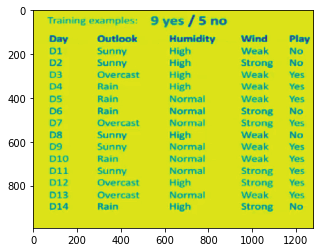

In [23]:
img = cv2.imread('dt_dataset.jpg')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img2)
plt.show()

In [24]:
print img.shape
print img2.shape

(993, 1280, 3)
(993, 1280)


In [26]:
# new = flowKernel(a,img2)
new2 = flowKernel3D(a_Sharpen,img)
new3 = flowKernel3D(a_GaussianBlur,img)
new4 = flowKernel3D(a_UnsharpMasking,img)

In [35]:
new2 = new2.reshape((991,1278))
print new2.shape
new3 = new3.reshape((989,1276))
print new3.shape
new4 = new4.reshape((989,1276))
print new4.shape
print img.shape
new5 = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
print new5.shape

(991, 1278)
(989, 1276)
(989, 1276)
(993, 1280, 3)
(993, 1280)


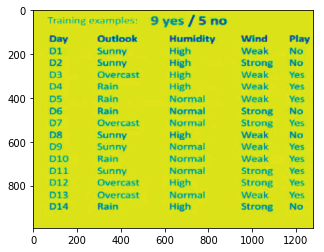

a_Sharpen


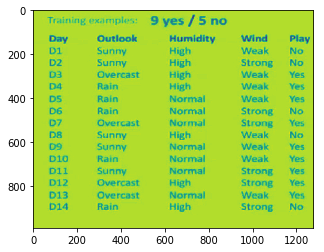

a_GaussianBlur


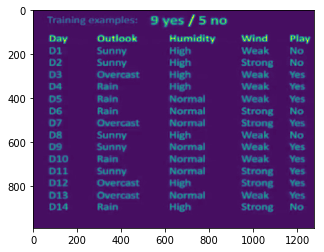

a_UnsharpMasking


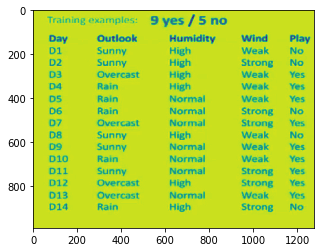

In [36]:
plt.imshow(new5)
plt.show()
print "a_Sharpen"
plt.imshow(new2)
plt.show()
print "a_GaussianBlur"
plt.imshow(new3)
plt.show()
print "a_UnsharpMasking"
plt.imshow(new4)
plt.show()